# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key, geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [70]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [74]:
# Set the API base URL
# YOUR CODE HERE


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.fromtimestamp(int(city_weather['dt'])).strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mugia
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | minas de marcona
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | eenhana
Processing Record 7 of Set 1 | sandnessjoen
Processing Record 8 of Set 1 | weno
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | porto novo
Processing Record 13 of Set 1 | jiazi
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | san antonio del estrecho
City not found. Skipping...
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set

Processing Record 38 of Set 4 | amga
Processing Record 39 of Set 4 | nadi
Processing Record 40 of Set 4 | prado
Processing Record 41 of Set 4 | tolanaro
Processing Record 42 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 43 of Set 4 | taitung city
Processing Record 44 of Set 4 | pervomaysk
Processing Record 45 of Set 4 | christchurch
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | kimbe
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 5 | fisterra
Processing Record 1 of Set 5 | constantia
Processing Record 2 of Set 5 | yaren
Processing Record 3 of Set 5 | atafu village
Processing Record 4 of Set 5 | tralee
Processing Record 5 of Set 5 | page
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | udachny
Processing Record 8 of Set 5 | sanandaj
Processing Record 9 of Set 5 | ishim
Processing Record 10 of Set 5 | colonia
Processin

Processing Record 29 of Set 8 | langepas
Processing Record 30 of Set 8 | beyneu
Processing Record 31 of Set 8 | old town
Processing Record 32 of Set 8 | anloga
Processing Record 33 of Set 8 | tanhacu
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | nogliki
Processing Record 36 of Set 8 | al kharijah
Processing Record 37 of Set 8 | qui nhon
Processing Record 38 of Set 8 | isabela
Processing Record 39 of Set 8 | mahenge
Processing Record 40 of Set 8 | acarau
Processing Record 41 of Set 8 | cable beach
City not found. Skipping...
Processing Record 42 of Set 8 | bomdila
Processing Record 43 of Set 8 | island harbour
Processing Record 44 of Set 8 | gao
Processing Record 45 of Set 8 | quibala
Processing Record 46 of Set 8 | kenai
Processing Record 47 of Set 8 | dedougou
Processing Record 48 of Set 8 | lodi
Processing Record 49 of Set 8 | la'ie
Processing Record 0 of Set 9 | kourou
Processing Record 1 of Set 9 | meadow lakes
Processing Record 2 of Set 9 | yuzhno-kuri

Processing Record 20 of Set 12 | suntar
Processing Record 21 of Set 12 | maua
Processing Record 22 of Set 12 | narasannapeta
Processing Record 23 of Set 12 | vila franca do campo
Processing Record 24 of Set 12 | margate
-----------------------------
Data Retrieval Complete      
-----------------------------


In [68]:
## This cell was all a test to get the data to save correctly

city = 'odessa'
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
response = requests.get(url)
city_weather = response.json()
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = datetime.fromtimestamp(int(city_weather['dt'])).strftime('%Y-%m-%d')


# Append the City information into city_data list
city_data.append({"City": city, 
                  "Lat": city_lat, 
                  "Lng": city_lng, 
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})

city_data



[{'City': 'odessa',
  'Lat': 46.4775,
  'Lng': 30.7326,
  'Max Temp': 281.92,
  'Humidity': 72,
  'Cloudiness': 100,
  'Wind Speed': 8.64,
  'Country': 'UA',
  'Date': '2023-04-27'}]

In [81]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count


city_data_df.count()


City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [82]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,12.27,72,86,2.27,AU,2023-04-27
1,port alfred,-33.5906,26.8910,18.99,85,89,0.45,ZA,2023-04-27
2,guerrero negro,27.9769,-114.0611,18.94,67,12,8.13,MX,2023-04-27
3,loa janan,-0.5830,117.0950,23.79,98,99,0.55,ID,2023-04-27
4,morehead city,34.7229,-76.7260,22.02,86,100,4.47,US,2023-04-27


In [86]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,12.27,72,86,2.27,AU,2023-04-27
1,port alfred,-33.5906,26.8910,18.99,85,89,0.45,ZA,2023-04-27
2,guerrero negro,27.9769,-114.0611,18.94,67,12,8.13,MX,2023-04-27
3,loa janan,-0.5830,117.0950,23.79,98,99,0.55,ID,2023-04-27
4,morehead city,34.7229,-76.7260,22.02,86,100,4.47,US,2023-04-27


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

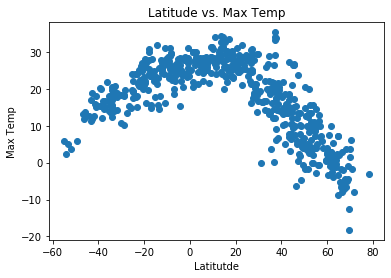

In [128]:
# Build scatter plot for latitude vs. temperature
lat_data = city_data_df['Lat']
temp_data = city_data_df['Max Temp']
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.xlabel('Latitutde')
plt.ylabel('Max Temp')
plt.title("Latitude vs. Max Temp")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

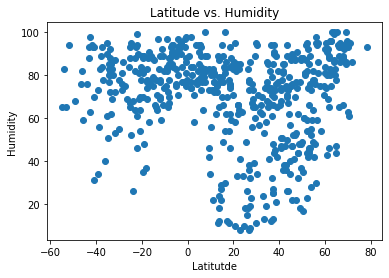

In [129]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
lat_data = city_data_df['Lat']
hum_data = city_data_df['Humidity']
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Humidity')
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

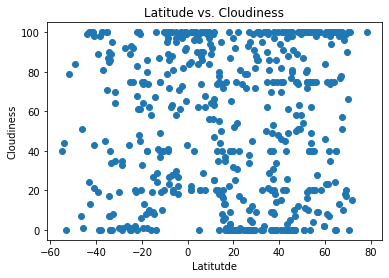

In [130]:
lat_data = city_data_df['Lat']
cloud_data = city_data_df['Cloudiness']
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

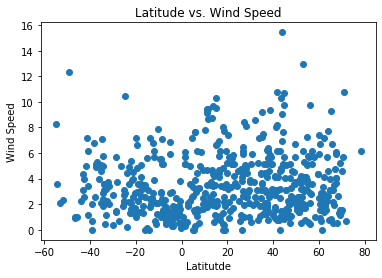

In [131]:
lat_data = city_data_df['Lat']
wind_data = city_data_df['Wind Speed']
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [149]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def createLinRegress(x_values, y_values):
    
    res = linregress(x_values, y_values)
    return res



#res = createLinRegress(lat_data,wind_data)
#plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

#res = createLinRegress(lat_data,cloud_data)
#plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

#res = createLinRegress(lat_data,hum_data)
#plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

In [150]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,guerrero negro,27.9769,-114.0611,18.94,67,12,8.13,MX,2023-04-27
4,morehead city,34.7229,-76.7260,22.02,86,100,4.47,US,2023-04-27
7,balabac,7.9868,117.0645,27.85,82,100,4.98,PH,2023-04-27
9,utrik,11.2278,169.8474,26.84,83,64,9.14,MH,2023-04-27
13,okha,53.5739,142.9478,-0.23,89,100,5.31,RU,2023-04-27


In [151]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,12.27,72,86,2.27,AU,2023-04-27
1,port alfred,-33.5906,26.8910,18.99,85,89,0.45,ZA,2023-04-27
3,loa janan,-0.5830,117.0950,23.79,98,99,0.55,ID,2023-04-27
5,port-aux-francais,-49.3500,70.2167,5.80,68,84,12.30,TF,2023-04-27
6,grytviken,-54.2811,-36.5092,2.38,83,44,3.54,GS,2023-04-27


###  Temperature vs. Latitude Linear Regression Plot

The correlation between Latitude and Max Temp is -0.87


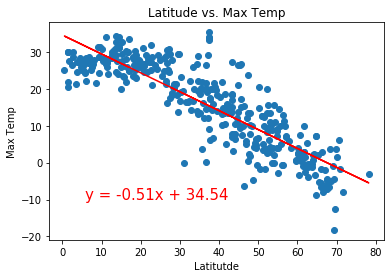

In [182]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

lat_data = northern_hemi_df['Lat']
temp_data = northern_hemi_df['Max Temp']
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitutde')
plt.ylabel('Max Temp')
plt.title("Latitude vs. Max Temp")
# Incorporate the other graph properties
# YOUR CODE HERE
res = createLinRegress(lat_data,temp_data)
plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
plt.annotate(line_eq,(5.8,-10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")
print(f"The correlation between Latitude and Max Temp for the Northern Hemisphere is {round(res.rvalue,2)}")
# Show plot
plt.show()


The correlation between Latitude and Max Temp for the Southern Hemisphere is 0.77


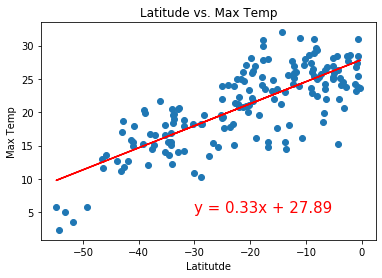

In [183]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

lat_data = southern_hemi_df['Lat']
temp_data = southern_hemi_df['Max Temp']
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitutde')
plt.ylabel('Max Temp')
plt.title("Latitude vs. Max Temp")
# Incorporate the other graph properties
# YOUR CODE HERE
res = createLinRegress(lat_data,temp_data)
plt.plot(lat_data, res.intercept + res.slope*lat_data, 'r', label='fitted line')

line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

print(f"The correlation between Latitude and Max Temp for the Southern Hemisphere is {round(res.rvalue,2)}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There seems to be an inverse relationship between distance from the equator and max temperature, it's very noticeable that as you get farther from the equator the max temperature goes down.

### Humidity vs. Latitude Linear Regression Plot

The correlation between Latitude and Humidity for the Northern Hemisphere is 0.1


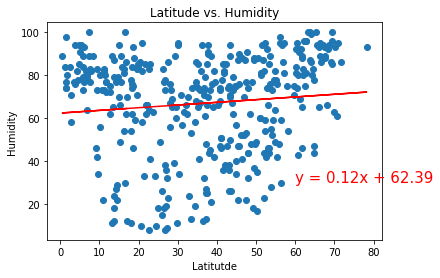

In [184]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
lat_data = northern_hemi_df['Lat']
hum_data = northern_hemi_df['Humidity']
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Humidity')
plt.title("Latitude vs. Humidity")

res = createLinRegress(lat_data,hum_data)
plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
plt.annotate(line_eq,(60,30),fontsize=15,color="red")

print(f"The correlation between Latitude and Humidity for the Northern Hemisphere is {round(res.rvalue,2)}")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

The correlation between Latitude and Humidity for the Southern Hemisphere is 0.22


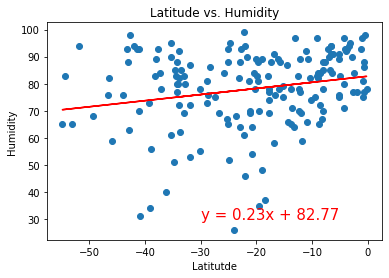

In [185]:
# Southern Hemisphere
# YOUR CODE HERE
lat_data = southern_hemi_df['Lat']
hum_data = southern_hemi_df['Humidity']
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Humidity')
plt.title("Latitude vs. Humidity")

res = createLinRegress(lat_data,hum_data)
plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

print(f"The correlation between Latitude and Humidity for the Southern Hemisphere is {round(res.rvalue,2)}")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very small relationship with northern climates and humidity. as you go from the South Pole to the North Pole you get slightly higher humidity. The correlation of this relationship is so minimal it's essentially not worth mentioning. But I didn it anywaays because I needed to put something here

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Latitude and Cloud Coverage for the Northern Hemisphere is 0.09


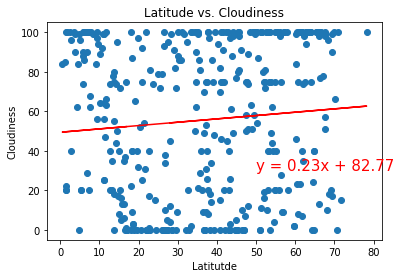

In [186]:
# Northern Hemisphere
# YOUR CODE HERE
lat_data = northern_hemi_df['Lat']
cloud_data = northern_hemi_df['Cloudiness']
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")

line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
plt.annotate(line_eq,(50,30),fontsize=15,color="red")

res = createLinRegress(lat_data,cloud_data)
plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

print(f"The correlation between Latitude and Cloud Coverage for the Northern Hemisphere is {round(res.rvalue,2)}")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

The correlation between Latitude and Cloud Coverage for the Southern Hemisphere is 0.18


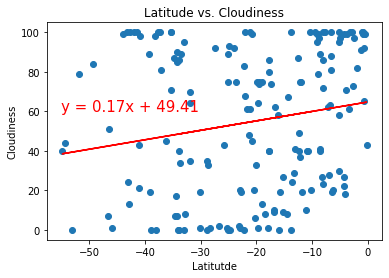

In [187]:
# Southern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
# YOUR CODE HERE
lat_data = southern_hemi_df['Lat']
cloud_data = southern_hemi_df['Cloudiness']
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")

line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

res = createLinRegress(lat_data,cloud_data)
plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

print(f"The correlation between Latitude and Cloud Coverage for the Southern Hemisphere is {round(res.rvalue,2)}")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very small relationship between going up the globe and cloudiness. Like the relationship between humidity and latitude, it's very small but cloud coverage does seem to slightly increase as you go farther north.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Latitude and Wind Speed for the Northern Hemisphere is -0.03


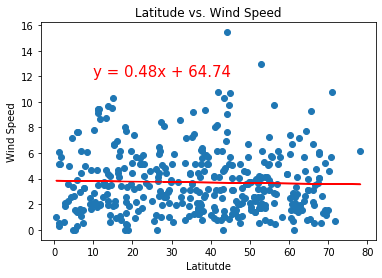

In [188]:
# Northern Hemisphere
# YOUR CODE HERE

lat_data = northern_hemi_df['Lat']
wind_data = northern_hemi_df['Wind Speed']
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed")

line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

res = createLinRegress(lat_data,wind_data)
plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

print(f"The correlation between Latitude and Wind Speed for the Northern Hemisphere is {round(res.rvalue,2)}")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


The correlation between Latitude and Wind Speed for the Southern Hemisphere is -0.26


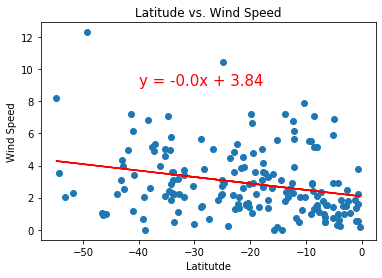

In [189]:
# Southern Hemisphere
# YOUR CODE HERE
lat_data = southern_hemi_df['Lat']
wind_data = southern_hemi_df['Wind Speed']
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitutde')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed")

line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
plt.annotate(line_eq,(-40,9),fontsize=15,color="red")

res = createLinRegress(lat_data,wind_data)
plt.plot(lat_data, res.intercept+ res.slope*lat_data, 'r', label='fitted line')

print(f"The correlation between Latitude and Wind Speed for the Southern Hemisphere is {round(res.rvalue,2)}")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** There is a slight negative relationship between latitude and wind speed. As you go farther south, the wind speed tends to pick up just a bit.